# Main Techniques to Digital Images Processing

The purpose with this notebook is to serve as a reference guide to consult techniques to digital image processing.

### Topics


### Requirements:

#### Notebook Implemented by Tiago Sá
* Github: https://github.com/rTiagoS

# Essentials Steps in Digital Image Processing
1. Image Acquisition;
2. Image Enhancement (noise removal, contrast adjustment, brightness etc);
3. Image Restoration;
4. Color Image Processing;
5. Wavelet and Multi-Resolution Processing;
6. Compression;
7. Morphological processing (extraction of essentials components);
8. Segmentation (allows to locate objects in an image and identify the boundaries of the objects);
9. Representation and Description; 
10. Object Recognition / Image Labeling;


In [2]:
import random
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import sys
import os

## Digital Image Processing to Data Augmentation

### Reasons to do so:
* Expanding the dataset through creation of new images with addition of noise forces the neural network to learn generalised features instead of overfitting on the dataset

### Random Horizontal Flip
An example how Random Horizontal Flip is implemented through classes.

In [8]:
# Create a path name. It automatically generates the '/' separator when passing the parameters
lib_path = os.path.join(os.path.realpath("."), "data_aug") 

# The sys.path function is a list and as such can be appended or extended to include new file paths 
# that will point to modules the user wants to import
sys.path.append(lib_path)

In [12]:
class RandomHorizontalFlip(object):
    """Randomly horizontally flips the Image with the probability *p
    
    Parameters
    ----------
    p: float 
        The probability with which the image is flipped
    
    Returns
    ---------
    numpy.ndaaray
        Flipped image in the numpy format of shape 'HxWxC'
        
    numpy.ndaaray
        Transformed bounding box coordinates of the format 'n x 4' where n is the number of bounding boxes
        and 4 represents x1,y1,x2,y2  of the box
    """
    
    # A constructor method to call when a object is created from the class
    # p = 1 if you want a deterministic version of this class
    def __init__(self, p = 0.5):
        self.p = p
        
    # The call function, when invokeed from a class instance takes two arguments, img and bboxes    
    def __call__(self, img, bboxes):
        #[::-1] reverse the list img_center and divide every item by 2
        img_center = np.array(img.shape[:2])[::-1]/2
        img_center = np.hstack((img_center, img_center))
        if random.random() <  self.p: #
            
            img = img[:, ::-1, :]           
            bboxes[:, [0,2]] = 2*(img_center[[0,2]] - bboxes[:, [0,2]])
            box_w = abs(bboxes[:,0] - bboxes[:,2])
            
            bboxes[:, 0] -= box_w
            bboxes[:, 2] += box_w
            
        return img_bboxes
            
            

### Breaking an Image into Small Pieces ( Splitting Images)

In [16]:
#Libs
import os
import sys
import shutil
import glob
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [66]:
# Variables to locate the images:

### INPUT DIRECTORIES ###
inp_img_dir = './Digital Image Processing/ImagesBeforeSplit'
input_images_list = glob.glob(inp_img_dir + '/*.JPG') #  A list of files with original images 
inp_msk_dir = None # No masks images this time


### OUTPUT DIRECTORIES ###
out_dir = './Digital Image Processing/ImagesAfterSplit'

### PIECES DIMENSIONS ###
height = 512
width = 512
start_num = 1



In [57]:
# Read an image before breaking it into pieces
image = cv2.imread(input_images_list[0])

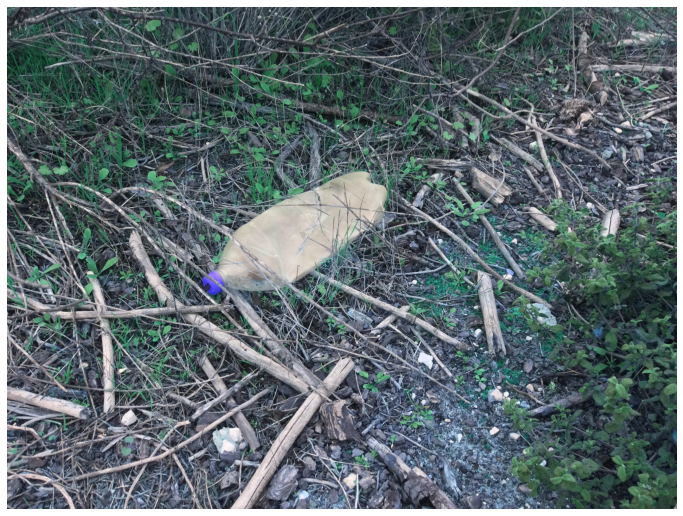

In [58]:
plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(image)

In [15]:
image.shape

(2448, 3264, 3)

In [17]:
# Useful function for creating a new directory and recursively deleting the contents of an existing one:
def dir_create(path):
    if (os.path.exists(path)) and (os.listdir(path) != []):
        shutil.rmtree(path)
        os.makedirs(path)
    if not os.path.exists(path):
        os.makedirs(path)

In [18]:
# Crop function that goes over the original image are adjusted to the original image limit and contain the original
# pixels
def crop(input_file, height, width):
    img = Image.open(input_file)
    img_width, img_height = img.size
    for i in range(img_height//height): # iterate over a horizontal line cells
        for j in range(img_width//width): # iterate over a vertical line cells
            box = (j*width, i*height, (j+1)*width, (i+1)*height) # Setting the points for cropped image.
            
            #Return sends a specified value back to its caller whereas Yield can produce a sequence of values
            yield img.crop(box) # Cropped image of above dimension. It will not change the original image.


In [67]:
# Function for splitting images and masks into smaller parts(the height and width of the cropping window, and
# the starting number are taken as input parameters)
def split(inp_img_dir, inp_msk_dir, out_dir, height, width, start_num):
    """Split images into smaller pieces with the specified height and width 
        inp_img_dir : str - path where the images to be cropped are located
        inp_msk_dir : str - path where the masks to be cropped are located
        out_dir : str - path where to save the pieces of the images
        height, width : positive int -  dimensions of the pieces """
    ### PATHS AND DIRECTORIES ###
    image_dir = os.path.join(out_dir, 'images') # generate path: out_dir + '/' + images
    mask_dir = os.path.join(out_dir, 'masks')
    dir_create(out_dir) # create the output directory
    dir_create(image_dir) # create the splitted images directory
    dir_create(mask_dir) # create the splitted masks directory (not used)
    
    img_list = [f for f in os.listdir(inp_img_dir)
               if os.path.isfile(os.path.join(inp_img_dir, f))]
    file_num = 0
    for infile in img_list:
        infile_path = os.path.join(inp_img_dir, infile)
        for k, piece in enumerate(crop(infile_path, height, width), start_num):
            img = Image.new('RGB', (height, width), 255)
            img.paste(piece)
            img_path = os.path.join(image_dir, infile.split('.')[0] + '_' + str(k).zfill(5) + '.png')
            img.save(img_path)
        
        if inp_msk_dir != None:
            infile_path = os.path.join(inp_msk_dir, infile.split('.')[0] + '.png')

            for k, piece in enumerate(crop(infile_path, height, width), start_num):

                msk = Image.new('RGB', (height, width), 255)
                msk.paste(piece)
                msk_path = os.path.join(mask_dir, infile.split('.')[0] + '_' + str(k).zfill(5) + '.png')
                msk.save(msk_path)
        file_num  += 1
        sys.stdout.write("\r File %s was processed." % file_num)
        sys.stdout.flush()

In [68]:
split(inp_img_dir, inp_msk_dir, out_dir, height, width, start_num)

 File 2 was processed.

In [59]:
output_images_list = glob.glob(out_dir + '/images' + '/*.png') # Get the path of the images cropped.

In [55]:
def image_part_plotter(images_list, offset):
    fig = plt.figure(figsize = (20,10))
    columns = 8
    rows = 3
    # ax enables access to manipulate each of subplots
    ax = []
    for i in range(columns * rows):
        #create subplot and append to ax
        img = mpimg.imread(images_list[i+offset])
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title("image part number" + str(i+1))
        plt.imshow(img)
    plt.show() # Render the plot

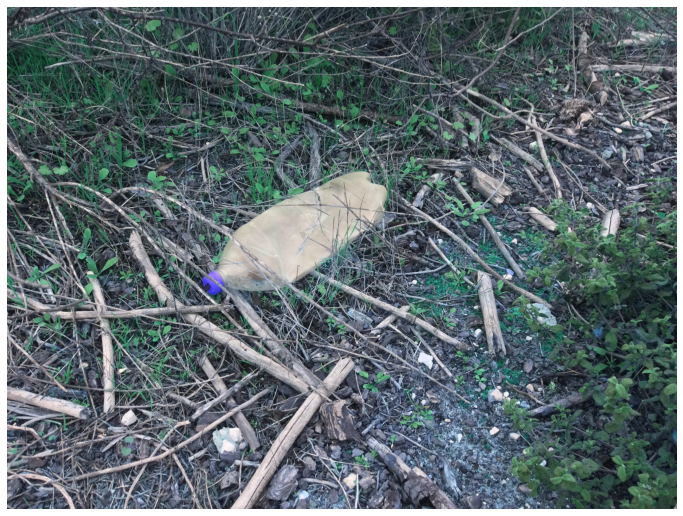

In [69]:
plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(image)

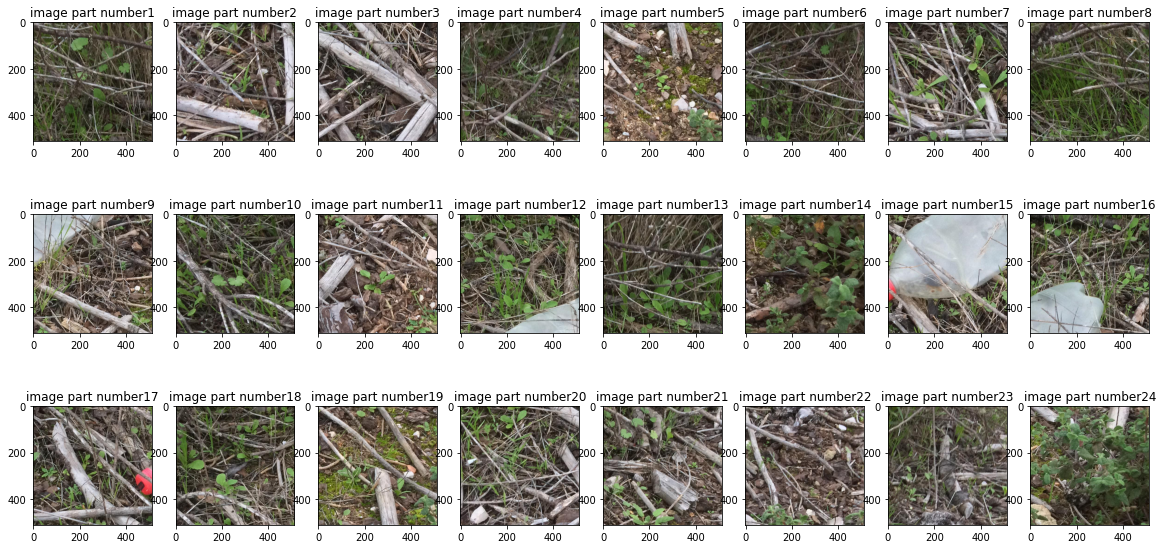

In [61]:
image_part_plotter(output_images_list, 0)

# Próximas implementações: 
1. Implementar uma função que permita criar o mosaico das imagens fatiadas de maneira que seja 
identica à imagem original.